In [1]:
# Загрузка зависимостей
import numpy
import pandas
import matplotlib.pyplot
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

In [2]:
# Загрузка и анализ набора данных
raw_dataset = pandas.read_csv('machine.data.csv', header=None) # Убедиться в правильности пути к файлу!
raw_dataset.head(10) # Вывод первых 10 строк

,0,1,2,3,4,5,6,7,8,9
0,adviser,32/60,125,256,6000,256,16,128,198,199
1,amdahl,470v/7,29,8000,32000,32,8,32,269,253
2,amdahl,470v/7a,29,8000,32000,32,8,32,220,253
3,amdahl,470v/7b,29,8000,32000,32,8,32,172,253
4,amdahl,470v/7c,29,8000,16000,32,8,16,132,132
5,amdahl,470v/b,26,8000,32000,64,8,32,318,290
6,amdahl,580-5840,23,16000,32000,64,16,32,367,381
7,amdahl,580-5850,23,16000,32000,64,16,32,489,381
8,amdahl,580-5860,23,16000,64000,64,16,32,636,749
9,amdahl,580-5880,23,32000,64000,128,32,64,1144,1238


In [3]:
# Размер набора данных
print(raw_dataset.shape)

(209, 10)


In [4]:
# Создаем набор данных, в котором будут храниться обработанные данные
dataset = pandas.DataFrame()

In [5]:
# Столбец №0
data = raw_dataset[0]

In [6]:
new_data = pandas.get_dummies(data)
print(new_data)

     adviser  amdahl  apollo  basf  bti  burroughs  c.r.d  cambex  cdc  dec  \
0          1       0       0     0    0          0      0       0    0    0   
1          0       1       0     0    0          0      0       0    0    0   
2          0       1       0     0    0          0      0       0    0    0   
3          0       1       0     0    0          0      0       0    0    0   
4          0       1       0     0    0          0      0       0    0    0   
..       ...     ...     ...   ...  ...        ...    ...     ...  ...  ...   
204        0       0       0     0    0          0      0       0    0    0   
205        0       0       0     0    0          0      0       0    0    0   
206        0       0       0     0    0          0      0       0    0    0   
207        0       0       0     0    0          0      0       0    0    0   
208        0       0       0     0    0          0      0       0    0    0   

     ...  microdata  nas  ncr  nixdorf  perkin-elme

In [7]:
dataset = new_data

In [8]:
print(dataset)

     adviser  amdahl  apollo  basf  bti  burroughs  c.r.d  cambex  cdc  dec  \
0          1       0       0     0    0          0      0       0    0    0   
1          0       1       0     0    0          0      0       0    0    0   
2          0       1       0     0    0          0      0       0    0    0   
3          0       1       0     0    0          0      0       0    0    0   
4          0       1       0     0    0          0      0       0    0    0   
..       ...     ...     ...   ...  ...        ...    ...     ...  ...  ...   
204        0       0       0     0    0          0      0       0    0    0   
205        0       0       0     0    0          0      0       0    0    0   
206        0       0       0     0    0          0      0       0    0    0   
207        0       0       0     0    0          0      0       0    0    0   
208        0       0       0     0    0          0      0       0    0    0   

     ...  microdata  nas  ncr  nixdorf  perkin-elme

In [9]:
# Столбец №2
data = raw_dataset[2]
print(data)

0      125
1       29
2       29
3       29
4       29
      ... 
204    124
205     98
206    125
207    480
208    480
Name: 2, Length: 209, dtype: int64


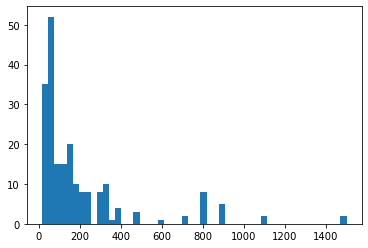

In [10]:
matplotlib.pyplot.hist(data, bins = 50)
matplotlib.pyplot.show()

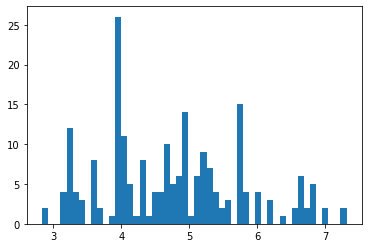

In [11]:
matplotlib.pyplot.hist(numpy.log(data), bins = 50)
matplotlib.pyplot.show()

In [12]:
data = numpy.log(data)

In [13]:
print(numpy.min(data))
print(numpy.max(data))

2.833213344056216
7.313220387090301


0.0
1.0


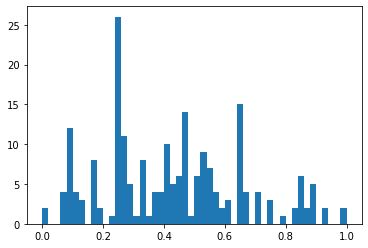

In [14]:
scaler = MinMaxScaler()
data = numpy.array(data).reshape(-1,1)
data = scaler.fit_transform(data)
data = data.flatten()
print(numpy.min(data))
print(numpy.max(data))
matplotlib.pyplot.hist(data, bins = 50)
matplotlib.pyplot.show()

In [15]:
dataset['2'] = data
print(dataset)

     adviser  amdahl  apollo  basf  bti  burroughs  c.r.d  cambex  cdc  dec  \
0          1       0       0     0    0          0      0       0    0    0   
1          0       1       0     0    0          0      0       0    0    0   
2          0       1       0     0    0          0      0       0    0    0   
3          0       1       0     0    0          0      0       0    0    0   
4          0       1       0     0    0          0      0       0    0    0   
..       ...     ...     ...   ...  ...        ...    ...     ...  ...  ...   
204        0       0       0     0    0          0      0       0    0    0   
205        0       0       0     0    0          0      0       0    0    0   
206        0       0       0     0    0          0      0       0    0    0   
207        0       0       0     0    0          0      0       0    0    0   
208        0       0       0     0    0          0      0       0    0    0   

     ...  nas  ncr  nixdorf  perkin-elmer  prime  s

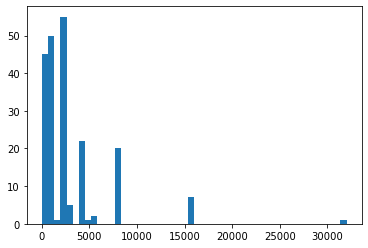

In [16]:
# Обработка данных в столбце №3 (MMIN: minimum main memory in kilobytes (integer))

# Загружаем данные
data = raw_dataset[3]

# Анализируем распределение, используя гистограмму. Параметр bins отвечает за число столбцов в гистрограмме.
matplotlib.pyplot.hist(data, bins = 50)
matplotlib.pyplot.show()

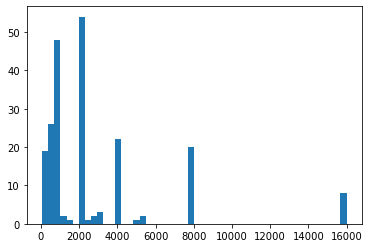

In [17]:
# Наблюдаем проблему №4 - выброс в районе 32000. Применяем отсечение с разрешенным интервалом от 0 до 16000.
data = numpy.clip(data, 0, 16000)

# Результат
matplotlib.pyplot.hist(data, bins = 50)
matplotlib.pyplot.show()

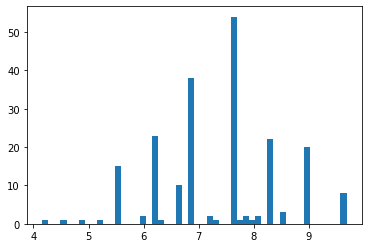

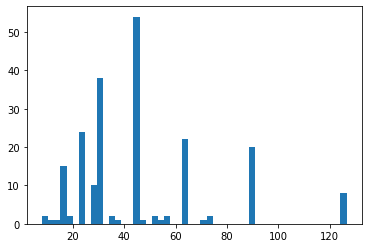

In [18]:
# Наблюдаем проблему №3 - очень неравномерное распределение. Попробуем применить к данным логарифм и извлечение квадратного корня.
matplotlib.pyplot.hist(numpy.log(data), bins = 50)
matplotlib.pyplot.show()

matplotlib.pyplot.hist(data ** 0.5, bins = 50)
matplotlib.pyplot.show()

In [19]:
# Логарифм даёт более равномерно распределенные данные, используем его
data = numpy.log(data)

In [20]:
# Теперь данные имеют следующую область значений
print(numpy.min(data))
print(numpy.max(data))

4.1588830833596715
9.680344001221918


In [21]:
# Приводим значения к интервалу (0, 1), считая, что они ближе к равномерному распределению
scaler = MinMaxScaler()
data = numpy.array(data).reshape(-1,1)
data = scaler.fit_transform(data)

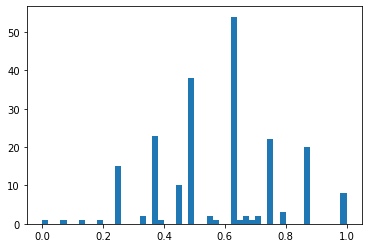

In [22]:
# Результат
matplotlib.pyplot.hist(data, bins = 50)
matplotlib.pyplot.show()

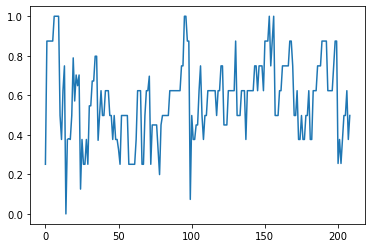

In [23]:
# Можем взглянуть на сами данные
matplotlib.pyplot.plot(data)
matplotlib.pyplot.show()

In [24]:
# Проверяем и убеждаемся, что в процессе трансформации данные получили "лишнее" измерение
print(data.ndim)

2


In [25]:
# Конвертируем в одномерный массив
data = data.flatten()

In [26]:
# Сохраняем в итоговом наборе данных
dataset['MMIN'] = data

0       6000
1      32000
2      32000
3      32000
4      16000
       ...  
204     8000
205     8000
206     8000
207     8000
208     4000
Name: 4, Length: 209, dtype: int64


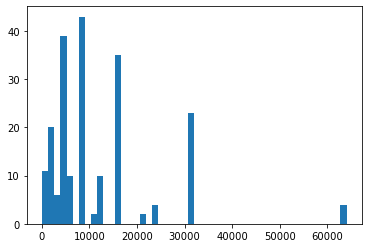

In [27]:
# Столбец №4
data = raw_dataset[4]
print(data)
matplotlib.pyplot.hist(data, bins = 50)
matplotlib.pyplot.show()

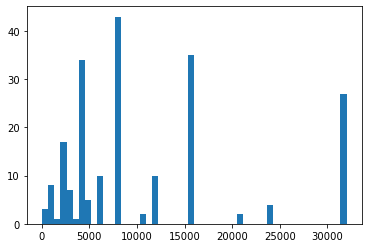

In [28]:
# Наблюдаем проблему №4 - выброс в районе 32000. Применяем отсечение с разрешенным интервалом от 0 до 16000.
data = numpy.clip(data, 0, 32000)

# Результат
matplotlib.pyplot.hist(data, bins = 50)
matplotlib.pyplot.show()

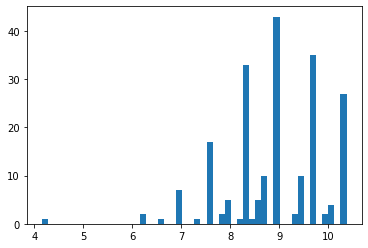

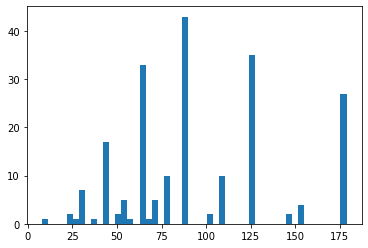

In [29]:
matplotlib.pyplot.hist(numpy.log(data), bins = 50)
matplotlib.pyplot.show()

matplotlib.pyplot.hist(data ** 0.5, bins = 50)
matplotlib.pyplot.show()

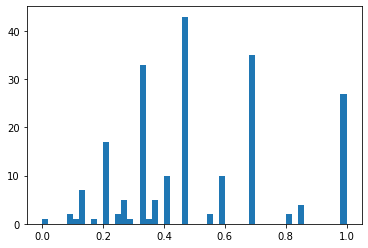

In [30]:
data = data ** 0.5
sscaler = MinMaxScaler()
data = numpy.array(data).reshape(-1,1)
data = scaler.fit_transform(data)
data = data.flatten()
matplotlib.pyplot.hist(data, bins = 50)
matplotlib.pyplot.show()

In [31]:
dataset['4'] = data
print(dataset)

     adviser  amdahl  apollo  basf  bti  burroughs  c.r.d  cambex  cdc  dec  \
0          1       0       0     0    0          0      0       0    0    0   
1          0       1       0     0    0          0      0       0    0    0   
2          0       1       0     0    0          0      0       0    0    0   
3          0       1       0     0    0          0      0       0    0    0   
4          0       1       0     0    0          0      0       0    0    0   
..       ...     ...     ...   ...  ...        ...    ...     ...  ...  ...   
204        0       0       0     0    0          0      0       0    0    0   
205        0       0       0     0    0          0      0       0    0    0   
206        0       0       0     0    0          0      0       0    0    0   
207        0       0       0     0    0          0      0       0    0    0   
208        0       0       0     0    0          0      0       0    0    0   

     ...  nixdorf  perkin-elmer  prime  siemens  sp

0      256
1       32
2       32
3       32
4       32
      ... 
204      0
205     32
206      0
207     32
208      0
Name: 5, Length: 209, dtype: int64


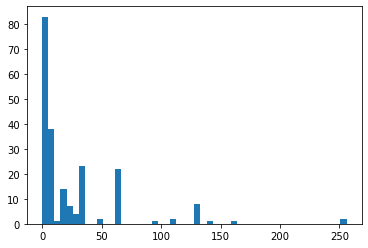

In [32]:
# Столбец №5
data = raw_dataset[5]
print(data)
matplotlib.pyplot.hist(data, bins = 50)
matplotlib.pyplot.show()

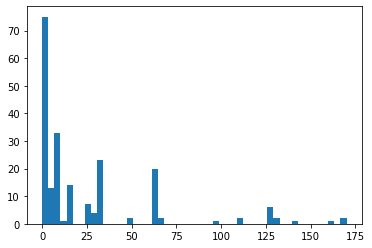

In [33]:
data = numpy.clip(data, 0, 170)

# Результат
matplotlib.pyplot.hist(data, bins = 50)
matplotlib.pyplot.show()

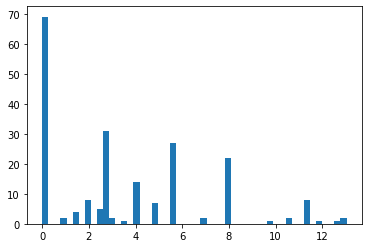

In [34]:
matplotlib.pyplot.hist(data ** 0.5, bins = 50)
matplotlib.pyplot.show()

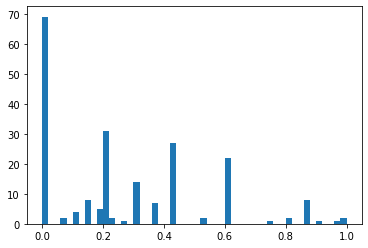

In [35]:
data = data ** 0.5
sscaler = MinMaxScaler()
data = numpy.array(data).reshape(-1,1)
data = scaler.fit_transform(data)
data = data.flatten()
matplotlib.pyplot.hist(data, bins = 50)
matplotlib.pyplot.show()

In [36]:
dataset['5'] = data
print(dataset)

     adviser  amdahl  apollo  basf  bti  burroughs  c.r.d  cambex  cdc  dec  \
0          1       0       0     0    0          0      0       0    0    0   
1          0       1       0     0    0          0      0       0    0    0   
2          0       1       0     0    0          0      0       0    0    0   
3          0       1       0     0    0          0      0       0    0    0   
4          0       1       0     0    0          0      0       0    0    0   
..       ...     ...     ...   ...  ...        ...    ...     ...  ...  ...   
204        0       0       0     0    0          0      0       0    0    0   
205        0       0       0     0    0          0      0       0    0    0   
206        0       0       0     0    0          0      0       0    0    0   
207        0       0       0     0    0          0      0       0    0    0   
208        0       0       0     0    0          0      0       0    0    0   

     ...  perkin-elmer  prime  siemens  sperry  sra

0      16
1       8
2       8
3       8
4       8
       ..
204     1
205     2
206     2
207     0
208     0
Name: 6, Length: 209, dtype: int64


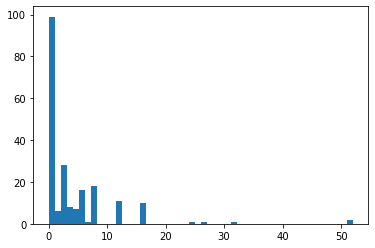

In [37]:
# Столбец №6
data = raw_dataset[6]
print(data)
matplotlib.pyplot.hist(data, bins = 50)
matplotlib.pyplot.show()

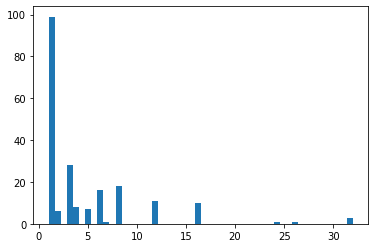

In [38]:
data = numpy.clip(data, 1, 32)

# Результат
matplotlib.pyplot.hist(data, bins = 50)
matplotlib.pyplot.show()

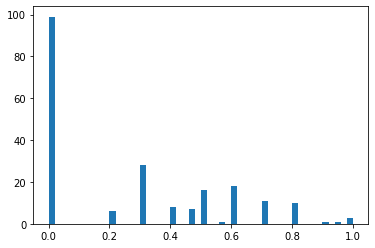

In [39]:
data = numpy.log(data)
sscaler = MinMaxScaler()
data = numpy.array(data).reshape(-1,1)
data = scaler.fit_transform(data)
data = data.flatten()
matplotlib.pyplot.hist(data, bins = 50)
matplotlib.pyplot.show()

In [40]:
dataset['6'] = data
print(dataset)

     adviser  amdahl  apollo  basf  bti  burroughs  c.r.d  cambex  cdc  dec  \
0          1       0       0     0    0          0      0       0    0    0   
1          0       1       0     0    0          0      0       0    0    0   
2          0       1       0     0    0          0      0       0    0    0   
3          0       1       0     0    0          0      0       0    0    0   
4          0       1       0     0    0          0      0       0    0    0   
..       ...     ...     ...   ...  ...        ...    ...     ...  ...  ...   
204        0       0       0     0    0          0      0       0    0    0   
205        0       0       0     0    0          0      0       0    0    0   
206        0       0       0     0    0          0      0       0    0    0   
207        0       0       0     0    0          0      0       0    0    0   
208        0       0       0     0    0          0      0       0    0    0   

     ...  prime  siemens  sperry  sratus  wang     

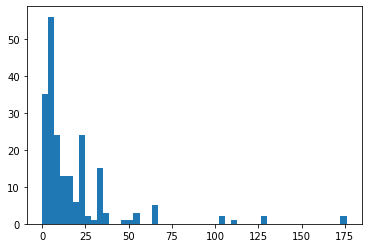

In [41]:
# Обработка данных в столбце №7 (CHMAX: maximum channels in units (integer))

# Загружаем данные
data = raw_dataset[7]

# Анализируем распределение, используя гистограмму. Параметр bins отвечает за число столбцов в гистрограмме.
matplotlib.pyplot.hist(data, bins = 50)
matplotlib.pyplot.show()

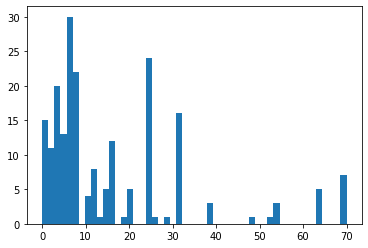

In [42]:
# Наблюдаем проблему №4 - выбросы значений в интервале (100, 175). Применяем отсечение с разрешенным интервалом от 0 до 70.
data = numpy.clip(data, 0, 70)

# Результат
matplotlib.pyplot.hist(data, bins = 50)
matplotlib.pyplot.show()

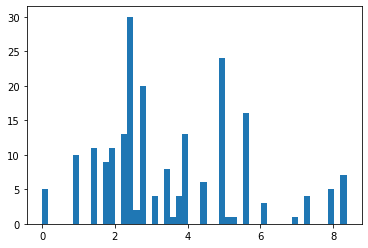

In [43]:
# Наблюдаем проблему №3 - очень неравномерное распределение. Применять логарифм нельзя, т.к. среди значений есть нули.
# Применим извлечение квадратного корня.

matplotlib.pyplot.hist(data ** 0.5, bins = 50)
matplotlib.pyplot.show()

In [44]:
data = data ** 0.5

In [45]:
# Теперь данные имеют следующую область значений
print(numpy.min(data))
print(numpy.max(data))

0.0
8.366600265340756


In [46]:
# Приводим значения к интервалу (0, 1), считая, что они ближе к равномерному распределению
scaler = MinMaxScaler()
data = numpy.array(data).reshape(-1,1)
data = scaler.fit_transform(data)

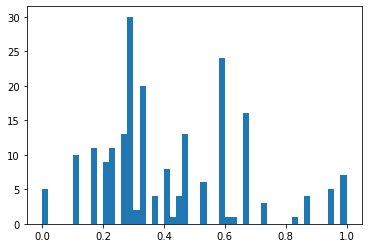

In [47]:
# Результат
matplotlib.pyplot.hist(data, bins = 50)
matplotlib.pyplot.show()

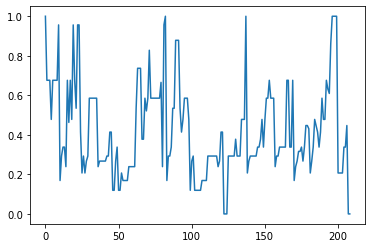

In [48]:
# Можем взглянуть на сами данные
matplotlib.pyplot.plot(data)
matplotlib.pyplot.show()

In [49]:
# Проверяем и убеждаемся, что в процессе трансформации данные получили "лишнее" измерение
print(data.ndim)

2


In [50]:
# Конвертируем в одномерный массив
data = data.flatten()

In [51]:
# Сохраняем в итоговом наборе данных
dataset['CHMAX'] = data

In [52]:
print(dataset)

     adviser  amdahl  apollo  basf  bti  burroughs  c.r.d  cambex  cdc  dec  \
0          1       0       0     0    0          0      0       0    0    0   
1          0       1       0     0    0          0      0       0    0    0   
2          0       1       0     0    0          0      0       0    0    0   
3          0       1       0     0    0          0      0       0    0    0   
4          0       1       0     0    0          0      0       0    0    0   
..       ...     ...     ...   ...  ...        ...    ...     ...  ...  ...   
204        0       0       0     0    0          0      0       0    0    0   
205        0       0       0     0    0          0      0       0    0    0   
206        0       0       0     0    0          0      0       0    0    0   
207        0       0       0     0    0          0      0       0    0    0   
208        0       0       0     0    0          0      0       0    0    0   

     ...  siemens  sperry  sratus  wang         2  

0      198
1      269
2      220
3      172
4      132
      ... 
204     42
205     46
206     52
207     67
208     45
Name: 8, Length: 209, dtype: int64


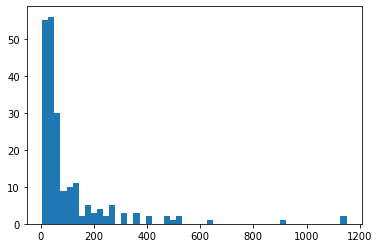

In [53]:
# Столбец №8
data = raw_dataset[8]
print(data)
matplotlib.pyplot.hist(data, bins = 50)
matplotlib.pyplot.show()

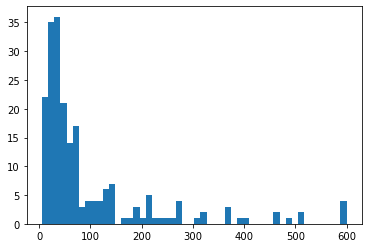

In [54]:
data = numpy.clip(data, 0, 600)

# Результат
matplotlib.pyplot.hist(data, bins = 50)
matplotlib.pyplot.show()

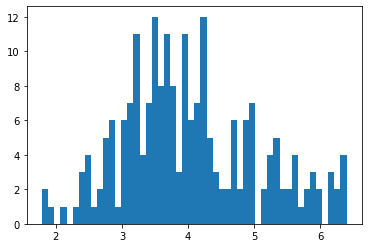

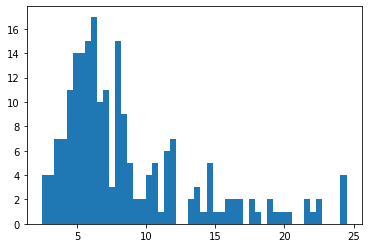

In [55]:
matplotlib.pyplot.hist(numpy.log(data), bins = 50)
matplotlib.pyplot.show()

matplotlib.pyplot.hist(data ** 0.5, bins = 50)
matplotlib.pyplot.show()

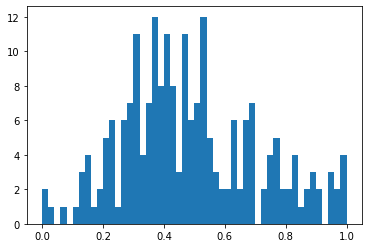

In [56]:
data = numpy.log(data)
sscaler = MinMaxScaler()
data = numpy.array(data).reshape(-1,1)
data = scaler.fit_transform(data)
data = data.flatten()
matplotlib.pyplot.hist(data, bins = 50)
matplotlib.pyplot.show()

In [57]:
dataset['8'] = data
print(dataset)

     adviser  amdahl  apollo  basf  bti  burroughs  c.r.d  cambex  cdc  dec  \
0          1       0       0     0    0          0      0       0    0    0   
1          0       1       0     0    0          0      0       0    0    0   
2          0       1       0     0    0          0      0       0    0    0   
3          0       1       0     0    0          0      0       0    0    0   
4          0       1       0     0    0          0      0       0    0    0   
..       ...     ...     ...   ...  ...        ...    ...     ...  ...  ...   
204        0       0       0     0    0          0      0       0    0    0   
205        0       0       0     0    0          0      0       0    0    0   
206        0       0       0     0    0          0      0       0    0    0   
207        0       0       0     0    0          0      0       0    0    0   
208        0       0       0     0    0          0      0       0    0    0   

     ...  sperry  sratus  wang         2      MMIN 

In [58]:
dataset.to_csv('prepared_data.csv')